In [1]:
import numpy as np
import pandas as pd

In [3]:
np.r_[1:3, 6:9] # 입력 코드에 이산, 연속이 혼재

array([1, 2, 6, 7, 8])

In [5]:
np.arange(4, 9)

array([4, 5, 6, 7, 8])

In [6]:
df = pd.read_csv("bike.csv")
df.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [7]:
df_sub = df.iloc[:, [0:3, 5:8]]

SyntaxError: invalid syntax (<ipython-input-7-a0f3cdeb7ad9>, line 1)

In [9]:
# df_sub = df.iloc[:, 0:3]
df_sub = df.iloc[:, 5:8]

In [10]:
df_sub = df.iloc[:, np.r_[1:3, 5:8]]
df_sub.head(2)

season  holiday  temp   atemp  humidity
0       1        0  9.84  14.395        81
1       1        0  9.02  13.635        80

In [25]:
np.random.seed(123)
np.random.normal(size = 5)

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

In [27]:
np.random.seed(123)

In [29]:
np.random.normal(size = 5)

array([ 1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ])

In [ ]:
ser = pd.Series([2, 4, 8, 9, 15])
ser

In [31]:
df_ser = ser.to_frame()
df_ser

0
0   2
1   4
2   8
3   9
4  15

In [32]:
df_ser[0]

0     2
1     4
2     8
3     9
4    15
Name: 0, dtype: int64

In [34]:
df_ser.columns = [99]
df_ser

99
0   2
1   4
2   8
3   9
4  15

In [35]:
df_ser[99]

0     2
1     4
2     8
3     9
4    15
Name: 99, dtype: int64

In [36]:
import os
os.listdir()

['.ipynb_checkpoints',
 'AWS_sample.txt',
 'bank.csv',
 'bike.csv',
 'bike.json',
 'bike_rental.csv',
 'bike_weather.csv',
 'classification_data_01.csv',
 'class_200525.ipynb',
 'class_200525.zip',
 'class_200526.ipynb',
 'class_scores.csv',
 'dataset.zip',
 'diabetes.csv',
 'diamonds.csv',
 'elec_load.csv',
 'iris_missing.csv',
 'iris_xlsx.xlsx',
 'join_list.csv',
 'join_room.csv',
 'linear_regression_01.csv',
 'logistic_regression_01.csv',
 'Pyrhon_DS_lv1_Final_cheat_sheet.ipynb',
 'Pyrhon_DS_lv1_Final_cheat_sheet.zip',
 'quiz_attendee',
 'quiz_attendee.zip',
 'rating_chocobar.csv',
 'regex_example_df.csv',
 'traffic_accident.txt',
 'traffic_highway.csv']

In [39]:
dia = pd.read_csv("diabetes.csv")
dia.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

## Q1. 혈압이 100 이상인 데이터만 추출하여 dia_BP_100GE 객체에 저장하시오.

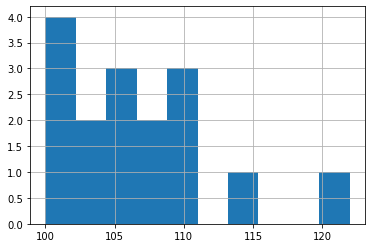

In [42]:
dia_BP_100GE = dia.loc[dia["BloodPressure"] >= 100, ]
dia_BP_100GE["BloodPressure"].hist()

## Q2. 나이가 40 미만인 데이터만 추출하여 dia_Age_40LT 객체에 저장하시오.

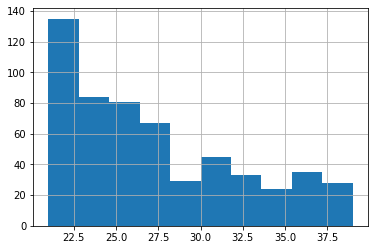

In [44]:
dia_Age_40LT = dia.loc[dia["Age"] < 40, ]
dia_Age_40LT["Age"].hist()

In [45]:
dia_Age_40LT["Age"].quantile([0, 1])

0.0    21.0
1.0    39.0
Name: Age, dtype: float64

In [46]:
dia_Age_40LT["Age"].agg(["max", "min"])

max    39
min    21
Name: Age, dtype: int64

## Q3. 혈당(Glucose)가 120 이상이면서, 혈압이 140 이상인 데이터를 추출하여 dia_danger 객체에 저장하고 row 개수를 확인하시오.

In [47]:
dia_danger = dia.loc[(dia["Glucose"] >= 120) & (dia["BloodPressure"] >= 140), ]
len(dia_danger)

0

In [49]:
dia.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

## Q4. 혈압이 기록되지 않은 경우는 0으로 처리되어 있다. 이 때, 혈압이 기록되지 않은 데이터의 개수를 확인하시오.

In [51]:
(dia["BloodPressure"] == 0).sum()

35

* iloc, loc 인덱서의 사용
 - 명시적으로 어떤 동작을 할지 지정(코드 가독성)
 - 보다 빠른 동작(거의 영향 없음)

In [56]:
# dia["Age"]
# dia[dia["Age"] >= 50]
dia.loc[dia["Age"] >= 50, ].head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
8            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
8                     0.158   53        1

In [58]:
dia.loc[dia["BloodPressure"] == 0, "BloodPressure"] = np.nan
dia.head(9)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      183           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
4            0      137           40.0             35      168  43.1   
5            5      116           74.0              0        0  25.6   
6            3       78           50.0             32       88  31.0   
7           10      115            NaN              0        0  35.3   
8            2      197           70.0             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1

In [59]:
dia.loc[dia["BloodPressure"].isna(), "BloodPressure"] = 0
dia.head(9)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      183           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
4            0      137           40.0             35      168  43.1   
5            5      116           74.0              0        0  25.6   
6            3       78           50.0             32       88  31.0   
7           10      115            0.0              0        0  35.3   
8            2      197           70.0             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1

In [60]:
dia_ordered = dia.sort_values(by = "BloodPressure", ascending = False)
dia_ordered.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
106            1       96          122.0              0        0  22.4   
691           13      158          114.0              0        0  42.3   

     DiabetesPedigreeFunction  Age  Outcome  
106                     0.207   27        0  
691                     0.257   44        1

## bike

In [61]:
df = pd.read_csv("bike.csv")
df_1 = df.head()
df_2 = df.tail()

In [62]:
df_bind = pd.concat([df_1, 
                     df_2])
len(df_bind)

10

## JOIN

In [67]:
df_room = pd.read_csv("join_room.csv", encoding="CP949")
df_list = pd.read_csv("join_list.csv", encoding="CP949")
df_list = df_list.sort_values(by = "member").reset_index(drop = True)
df_list

team    No member
0        TWICE  1788     나연
1        TWICE  1408     다현
2        TWICE  1525     모모
3        TWICE  1287     미나
4        TWICE  1547     사나
5   Red Velvet  1448     슬기
6   Red Velvet  1452    아이린
7   Red Velvet  1565     예리
8   Red Velvet  1948     웬디
9        TWICE  1881     정연
10  Red Velvet  1670     조이
11       TWICE  1937     지효
12       TWICE  1887     쯔위
13       TWICE  1045     채연

In [68]:
df_list.join(df_room, how = "left")

team    No member  floor  room name
0        TWICE  1788     나연    3.0  3G-A   미나
1        TWICE  1408     다현    3.0  3G-B   나연
2        TWICE  1525     모모    3.0  3G-C   다현
3        TWICE  1287     미나    4.0  4G-A   정연
4        TWICE  1547     사나    4.0  4G-B   지효
5   Red Velvet  1448     슬기    4.0  4G-C   채연
6   Red Velvet  1452    아이린    5.0  5G-A   모모
7   Red Velvet  1565     예리    5.0  5G-B   쯔위
8   Red Velvet  1948     웬디    5.0  5G-C   사나
9        TWICE  1881     정연    NaN   NaN  NaN
10  Red Velvet  1670     조이    NaN   NaN  NaN
11       TWICE  1937     지효    NaN   NaN  NaN
12       TWICE  1887     쯔위    NaN   NaN  NaN
13       TWICE  1045     채연    NaN   NaN  NaN

In [72]:
df_room = pd.read_csv("join_room.csv", encoding="CP949")
df_list = pd.read_csv("join_list.csv", encoding="CP949")

In [73]:
df_room = df_room.set_index("name")
df_list = df_list.set_index("member")
df_list.head(1)

team    No
member             
미나      TWICE  1287

In [75]:
df_list.join(df_room, how = "left").reset_index()

member        team    No  floor  room
0      미나       TWICE  1287    3.0  3G-A
1      나연       TWICE  1788    3.0  3G-B
2      다현       TWICE  1408    3.0  3G-C
3      정연       TWICE  1881    4.0  4G-A
4      지효       TWICE  1937    4.0  4G-B
5      채연       TWICE  1045    4.0  4G-C
6      모모       TWICE  1525    5.0  5G-A
7      쯔위       TWICE  1887    5.0  5G-B
8      사나       TWICE  1547    5.0  5G-C
9     아이린  Red Velvet  1452    NaN   NaN
10     웬디  Red Velvet  1948    NaN   NaN
11     슬기  Red Velvet  1448    NaN   NaN
12     조이  Red Velvet  1670    NaN   NaN
13     예리  Red Velvet  1565    NaN   NaN

In [78]:
df = pd.read_csv("diamonds.csv")
df.head(1)

carat    cut color clarity  depth  table  price     x     y     z
0   0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43

In [77]:
df.loc[:, "price":].agg(["max", "min"])

price      x     y     z
max  18823  10.74  58.9  31.8
min    326   0.00   0.0   0.0

In [80]:
df.loc[:, "price":].agg(["max", "min"]).transpose().reset_index()

index       max    min
0  price  18823.00  326.0
1      x     10.74    0.0
2      y     58.90    0.0
3      z     31.80    0.0

In [81]:
bike = pd.read_csv("bike.csv")
bike.head(1)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16

In [83]:
bike.groupby("season")["casual", "registered"].mean().reset_index()

season     casual  registered
0       1  15.489576  100.853686
1       2  47.446762  167.804610
2       3  52.220271  182.196853
3       4  28.580834  170.407462

In [3]:
elec = pd.read_csv("elec_load.csv")
elec.head(2)

YEAR  MONTH  DAY   X1HR   X2HR   X3HR   X4HR   X5HR   X6HR   X7HR  ...  \
0  2008      1    1  39638  37682  35801  34154  33068  32529  31982  ...   
1  2008      1    2  37425  35239  33568  32171  31616  31725  32575  ...   

   X15HR  X16HR  X17HR  X18HR  X19HR  X20HR  X21HR  X22HR  X23HR  X24HR  
0  28147  28313  28683  30921  32879  33038  34031  34684  37444  38160  
1  38213  38132  38399  39796  40810  39980  40084  39630  42008  42150  

[2 rows x 27 columns]

In [4]:
elec.iloc[:2, 8:19]

X6HR   X7HR   X8HR   X9HR  X10HR  X11HR  X12HR  X13HR  X14HR  X15HR  X16HR
0  32529  31982  30961  28323  27869  28172  28501  28202  28227  28147  28313
1  31725  32575  34090  35604  37967  38853  39103  36666  37691  38213  38132

In [5]:
elec.iloc[0, ]

YEAR      2008
MONTH        1
DAY          1
X1HR     39638
X2HR     37682
X3HR     35801
X4HR     34154
X5HR     33068
X6HR     32529
X7HR     31982
X8HR     30961
X9HR     28323
X10HR    27869
X11HR    28172
X12HR    28501
X13HR    28202
X14HR    28227
X15HR    28147
X16HR    28313
X17HR    28683
X18HR    30921
X19HR    32879
X20HR    33038
X21HR    34031
X22HR    34684
X23HR    37444
X24HR    38160
Name: 0, dtype: int64

In [6]:
elec.iloc[0, ].reset_index()

index      0
0    YEAR   2008
1   MONTH      1
2     DAY      1
3    X1HR  39638
4    X2HR  37682
5    X3HR  35801
6    X4HR  34154
7    X5HR  33068
8    X6HR  32529
9    X7HR  31982
10   X8HR  30961
11   X9HR  28323
12  X10HR  27869
13  X11HR  28172
14  X12HR  28501
15  X13HR  28202
16  X14HR  28227
17  X15HR  28147
18  X16HR  28313
19  X17HR  28683
20  X18HR  30921
21  X19HR  32879
22  X20HR  33038
23  X21HR  34031
24  X22HR  34684
25  X23HR  37444
26  X24HR  38160

In [7]:
elec_melt = elec.melt(id_vars = ["YEAR", "MONTH", "DAY"])
elec_melt.head()

YEAR  MONTH  DAY variable  value
0  2008      1    1     X1HR  39638
1  2008      1    2     X1HR  37425
2  2008      1    3     X1HR  40757
3  2008      1    4     X1HR  40220
4  2008      1    5     X1HR  39056

In [8]:
elec.columns[:3]

Index(['YEAR', 'MONTH', 'DAY'], dtype='object')

In [9]:
elec_melt = elec.melt(id_vars = elec.columns[:3])
elec_melt.head(1)

YEAR  MONTH  DAY variable  value
0  2008      1    1     X1HR  39638

In [10]:
elec_melt = elec_melt.rename(columns = {"variable": "HOUR",
                                        "value": "LOAD"})
elec_melt.head(2)

YEAR  MONTH  DAY  HOUR   LOAD
0  2008      1    1  X1HR  39638
1  2008      1    2  X1HR  37425

* pd.Series.str.replace()
    - **pat**: pattern
    - **repl**: replacement

In [11]:
elec_melt["HOUR_new"] = elec_melt["HOUR"].str.replace(pat = "X", repl = "")
elec_melt["HOUR_new"] = elec_melt["HOUR_new"].str.replace(pat = "HR", repl = "")
elec_melt.head(2)

YEAR  MONTH  DAY  HOUR   LOAD HOUR_new
0  2008      1    1  X1HR  39638        1
1  2008      1    2  X1HR  37425        1

In [12]:
elec_melt["YEAR"].dtype

dtype('int64')

In [13]:
type(elec_melt["HOUR_new"][0])

str

In [14]:
elec_melt["HOUR_new"] = elec_melt["HOUR_new"].astype("int")
type(elec_melt["HOUR_new"][0])

numpy.int32

In [15]:
elec_melt["HOUR_reg1"] = elec_melt["HOUR"].str.replace(pat = "X|HR", repl = "")
elec_melt.head(2)

YEAR  MONTH  DAY  HOUR   LOAD  HOUR_new HOUR_reg1
0  2008      1    1  X1HR  39638         1         1
1  2008      1    2  X1HR  37425         1         1

* \[^0-9\]: 숫자를 제외한 나머지

In [16]:
elec_melt["HOUR_reg2"] = elec_melt["HOUR"].str.replace(pat = "[^0-9]", repl = "")
elec_melt.head(2)

YEAR  MONTH  DAY  HOUR   LOAD  HOUR_new HOUR_reg1 HOUR_reg2
0  2008      1    1  X1HR  39638         1         1         1
1  2008      1    2  X1HR  37425         1         1         1

In [17]:
price = pd.Series(["12,345원", "4,567$"])
price

0    12,345원
1     4,567$
dtype: object

In [18]:
price.str.replace(pat = "[^0-9]", repl = "").astype("float")

0    12345.0
1     4567.0
dtype: float64

## Q. elec_melt 객체를 기준으로 다음 퀴즈를 풀이하시오.
### Q1. 22시 부터 06시 사이의 데이터를 추출하여 elec_night 에 저장하시오.

In [19]:
np.r_[22:25, 0:7]

array([22, 23, 24,  0,  1,  2,  3,  4,  5,  6])

In [20]:
elec_night = elec_melt.loc[elec_melt["HOUR_new"].isin(np.r_[22:25, 0:7]), ]
elec_night.head(2)

YEAR  MONTH  DAY  HOUR   LOAD  HOUR_new HOUR_reg1 HOUR_reg2
0  2008      1    1  X1HR  39638         1         1         1
1  2008      1    2  X1HR  37425         1         1         1

In [21]:
elec_night["HOUR"].unique()

array(['X1HR', 'X2HR', 'X3HR', 'X4HR', 'X5HR', 'X6HR', 'X22HR', 'X23HR',
       'X24HR'], dtype=object)

In [25]:
elec_night = elec_melt.loc[(elec_melt["HOUR_new"] <= 6) | (elec_melt["HOUR_new"] >= 22), ]
elec_night["HOUR"].unique()

array(['X1HR', 'X2HR', 'X3HR', 'X4HR', 'X5HR', 'X6HR', 'X22HR', 'X23HR',
       'X24HR'], dtype=object)

### Q2. elec_night 객체를 기준으로 연도별 월별 전력 부하 평균을 구하여 elec_night_avg 객체에 저장하시오.

In [26]:
elec_night_avg = elec_night.groupby(["YEAR", "MONTH"])["LOAD"].mean()
elec_night_avg.head()

YEAR  MONTH
2008  1        39446.279570
      2        39971.942529
      3        38579.250896
      4        35761.233333
      5        34294.308244
Name: LOAD, dtype: float64

In [27]:
elec_night_avg = elec_night.groupby(["YEAR", "MONTH"])["LOAD"].mean().reset_index()
elec_night_avg.head()

YEAR  MONTH          LOAD
0  2008      1  39446.279570
1  2008      2  39971.942529
2  2008      3  38579.250896
3  2008      4  35761.233333
4  2008      5  34294.308244

### Q3. elec_night_avg 를 참고하여 전력 부하 평균이 가장 낮은 연도와 월을 차례대로 기술하시오.

In [28]:
elec_night_avg["LOAD"].min()

34006.36666666667

In [29]:
elec_night_avg.loc[elec_night_avg["LOAD"] == elec_night_avg["LOAD"].min(), ]

YEAR  MONTH          LOAD
8  2008      9  34006.366667

In [33]:
elec_night_avg.loc[elec_night_avg["LOAD"] == elec_night_avg["LOAD"].min(), ["YEAR", "MONTH"]]

YEAR  MONTH
8  2008      9

In [34]:
elec_night_avg.loc[elec_night_avg["LOAD"].idxmin(), ]

YEAR      2008.000000
MONTH        9.000000
LOAD     34006.366667
Name: 8, dtype: float64

In [35]:
elec_night_avg.loc[[elec_night_avg["LOAD"].idxmin()], ]

YEAR  MONTH          LOAD
8  2008      9  34006.366667

In [90]:
df_dia = pd.read_csv("diamonds.csv")
df_dia_sub = df_dia.loc[:5, "x":] # index
df_dia_sub

x     y     z
0  3.95  3.98  2.43
1  3.89  3.84  2.31
2  4.05  4.07  2.31
3  4.20  4.23  2.63
4  4.34  4.35  2.75
5  3.94  3.96  2.48

In [91]:
df_dia_sub = df_dia.iloc[:5, ]
df_dia_sub

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

## 시간 데이터 핸들링

In [36]:
ser = pd.Series([43900, 44000])

In [37]:
pd.to_datetime(ser, unit = "D", origin = pd.Timestamp("1900-01-01"))

0   2020-03-12
1   2020-06-20
dtype: datetime64[ns]

In [38]:
ser_time = pd.to_datetime(ser, unit = "D", origin = pd.Timestamp("1900-01-01"))

In [40]:
print(ser_time.dt.year)
print(ser_time.dt.month)
print(ser_time.dt.day)

0    2020
1    2020
dtype: int64
0    3
1    6
dtype: int64
0    12
1    20
dtype: int64


In [44]:
ser_time.dt.year()

TypeError: 'Series' object is not callable

In [47]:
ser_time.dt.weekday

0    3
1    5
dtype: int64

In [48]:
ser_time.dt.weekday_name

0    Thursday
1    Saturday
dtype: object

## 사용자 정의 함수 실습

In [51]:
def nor_minmax(x):
    return (x - x.min()) / (x.max() - x.min())

In [52]:
nor_minmax(pd.Series([2, 5, 7, 9, 100]))

0    0.000000
1    0.030612
2    0.051020
3    0.071429
4    1.000000
dtype: float64

In [55]:
def nor_std(x):
    return (x - x.mean()) / x.std()

In [56]:
nor_std(pd.Series([2, 5, 7, 9, 100]))

0   -0.535176
1   -0.464135
2   -0.416774
3   -0.369413
4    1.785497
dtype: float64

In [60]:
(nor_minmax(np.arange(-40, 160)) * 100).round()

array([  0.,   1.,   1.,   2.,   2.,   3.,   3.,   4.,   4.,   5.,   5.,
         6.,   6.,   7.,   7.,   8.,   8.,   9.,   9.,  10.,  10.,  11.,
        11.,  12.,  12.,  13.,  13.,  14.,  14.,  15.,  15.,  16.,  16.,
        17.,  17.,  18.,  18.,  19.,  19.,  20.,  20.,  21.,  21.,  22.,
        22.,  23.,  23.,  24.,  24.,  25.,  25.,  26.,  26.,  27.,  27.,
        28.,  28.,  29.,  29.,  30.,  30.,  31.,  31.,  32.,  32.,  33.,
        33.,  34.,  34.,  35.,  35.,  36.,  36.,  37.,  37.,  38.,  38.,
        39.,  39.,  40.,  40.,  41.,  41.,  42.,  42.,  43.,  43.,  44.,
        44.,  45.,  45.,  46.,  46.,  47.,  47.,  48.,  48.,  49.,  49.,
        50.,  50.,  51.,  51.,  52.,  52.,  53.,  53.,  54.,  54.,  55.,
        55.,  56.,  56.,  57.,  57.,  58.,  58.,  59.,  59.,  60.,  60.,
        61.,  61.,  62.,  62.,  63.,  63.,  64.,  64.,  65.,  65.,  66.,
        66.,  67.,  67.,  68.,  68.,  69.,  69.,  70.,  70.,  71.,  71.,
        72.,  72.,  73.,  73.,  74.,  74.,  75.,  7

In [2]:
elec = pd.read_csv("elec_load.csv")
elec.head(1)

YEAR  MONTH  DAY   X1HR   X2HR   X3HR   X4HR   X5HR   X6HR   X7HR  ...  \
0  2008      1    1  39638  37682  35801  34154  33068  32529  31982  ...   

   X15HR  X16HR  X17HR  X18HR  X19HR  X20HR  X21HR  X22HR  X23HR  X24HR  
0  28147  28313  28683  30921  32879  33038  34031  34684  37444  38160  

[1 rows x 27 columns]

In [3]:
elec["LOAD_avg"] = elec.iloc[:, 3:].mean(axis = 1)
elec.head(2)

YEAR  MONTH  DAY   X1HR   X2HR   X3HR   X4HR   X5HR   X6HR   X7HR  ...  \
0  2008      1    1  39638  37682  35801  34154  33068  32529  31982  ...   
1  2008      1    2  37425  35239  33568  32171  31616  31725  32575  ...   

   X16HR  X17HR  X18HR  X19HR  X20HR  X21HR  X22HR  X23HR  X24HR      LOAD_avg  
0  28313  28683  30921  32879  33038  34031  34684  37444  38160  32142.041667  
1  38132  38399  39796  40810  39980  40084  39630  42008  42150  37228.958333  

[2 rows x 28 columns]

In [4]:
elec.iloc[:, 3:].mean(axis = 0)

X1HR        46606.407783
X2HR        44362.028765
X3HR        43099.649746
X4HR        42437.367456
X5HR        42584.786238
X6HR        43358.328821
X7HR        44800.829667
X8HR        46253.886915
X9HR        48815.054710
X10HR       51076.114495
X11HR       52013.622391
X12HR       52167.474901
X13HR       49477.609983
X14HR       51239.120135
X15HR       51861.509870
X16HR       51499.758883
X17HR       51491.405527
X18HR       51355.439932
X19HR       51712.749295
X20HR       52047.203892
X21HR       51623.029893
X22HR       50595.785674
X23HR       50989.525381
X24HR       50070.942470
LOAD_avg    48814.151368
dtype: float64

In [10]:
elec.iloc[:, 23:].apply(lambda x: round(x.mean()), axis = 0)

X21HR       51623
X22HR       50596
X23HR       50990
X24HR       50071
LOAD_avg    48814
dtype: int64

In [11]:
elec.iloc[:5, 23:].apply(lambda x: round(x.mean()), axis = 1)

0    35292
1    40220
2    39609
3    38008
4    42972
dtype: int64

In [12]:
elec["X1HR"].quantile(0.5)

46113.0

In [13]:
elec["X1HR"].median()

46113.0

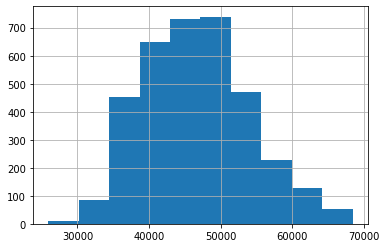

In [15]:
elec["X1HR"].hist()

In [17]:
print(elec["X1HR"].mean())
print(elec["X1HR"].max())
print(elec["X1HR"].min())
print(elec["X1HR"].var())
print(elec["X1HR"].std())
print(elec["X1HR"].median())
print(elec["X1HR"].skew())
print(elec["X1HR"].kurt())
print(elec["X1HR"].quantile(0.25)) # 제 1사분위수
print(elec["X1HR"].quantile(0.50)) # 제 2사분위수
print(elec["X1HR"].quantile(0.75)) # 제 3사분위수

46606.40778341793
68403
25938
54771925.200661585
7400.805712938395
46113.0
0.3270710680903927
-0.29000899434435157
40945.25
46113.0
51394.75


In [18]:
from scipy.stats.stats import pearsonr

In [19]:
df = pd.read_excel("iris_xlsx.xlsx")

In [20]:
pearsonr(df["Sepal.Length"], df["Sepal.Width"])

(-0.11756978413300204, 0.15189826071144918)

In [22]:
stat, p = pearsonr(df["Sepal.Length"], df["Sepal.Width"])
print("stat: " + str(round(stat, 5))) # 검정통계량
print("p-value: " + str(round(p, 5))) # P-value

stat: -0.11757
p-value: 0.1519


In [23]:
df.corr()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000

### 가설 검정 절차
 1) 가설 설정(귀무가설, 대립가설) <br>
 2) 데이터 확보 <br>
 3) 가설 검정 방법 확정 <br>
 4) 검정통계량 산출: 각 검정의 검정통계량 산출식 활용 <br>
 5) P-value 산출: 산출된 검정통계량과 그에 대응되는 분포를 활용하여 P-value 산출 <br>
 6) 유의수준 고려: 1%, **5%**, 10% <br>
 7) 귀무가설 기각여부 확인 <br>
   ※ 귀무가설을 기각하고 대립가설을 채택 <br>
   ※ 귀무가설을 기각하지 못함 <br>
 8) 귀무가설 기각여부에 따른 상세 해석 <br>